## DEUTSCH ALGORITHM

> ### Deutsch's Problem
> **Input:** 
> * A function $f: \{0,1\} \rightarrow \{0,1\}$
>
> **Output:** 
> * $0$ if $f$ is **constant** ($f(0) = f(1)$)
> * $1$ if $f$ is **balanced** ($f(0) \neq f(1)$) 

The input is represented as a function $f: \{0,1\} \rightarrow \{0,1\}$. We can think of this as a two bit chain $f(0)f(1)$. Every clasical algorithm needs at least two querys $f(0)$ and $f(1)$ to determine wether the function is constant or balanced. With Deutsch algorithm, we can solve this problem with just one query. We will follow the following procedure:
* **Initialitation:** We prepare a 2 qbit circuit in the state $\ket{0}\ket{1}$ by applying an $X$ gate to the second qubit.
* **Superposition:** we apply a Hadamard gate to both qbits. The state becomes $\ket{+}\ket{-}$
* **Oracle:** we apply the oracle to the qbits. Due to the phase kickback mechanism, the $\ket{-}$ state of the auxiliary qubit remains unchanged, but the phase $(-1)^{f(x)}$ is shifted onto the first qubit.
* **Interference:** We apply a Hadamard gate to the first qubit. This combines the phases, so if $f(0) = f(1)$, the first qbit returns to $\ket{0}$. If not, it becomes $\ket{1}$
* **Measurement:** We measure the first qubit. If the result is $0$, the function is constant; if the result is $1$, the function is balanced.


There are only 4 posible functions {0,1} $\to $ {0,1}
| Case | Gates | Function $f(x)$ | Type |
| :---: | :--- | :--- | :--- |
| 0 | None | $f(x) = 0$ | Constant |
| 1 | X | $f(x) = 1$ | Constant |
| 2 | CNOT| $f(x) = x$ | Balanced |
| 3 | CNOT + X  | $f(x) = \bar{x}$ | Balanced |

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Operator
from random import choice

In [68]:
def deutsch_function(case: int):
    """
    Implements the Deutsch function for a single qubit.
    
    Args:
        case (int): An integer (0 to 3) representing the function to implement.
                    0: Constant function returning 0
                    1: Constant function returning 1
                    2: Balanced function returning input
                    3: Balanced function returning NOT input
    Returns:
        qiskit.QuantumCircuit: The quantum circuit implementing the specified function.
    """

    # Create a quantum circuit with 2 qubits (1 input qubit and 1 output qubit)
    qc = QuantumCircuit(2)

    if case == 0:
        # Constant function returning 0: Do nothing
        pass
    elif case == 1:
        # Constant function returning 1: X gate
        qc.x(1)
    elif case == 2:
        # Balanced function returning input: CNOT gate
        qc.cx(0, 1)
    elif case == 3:
        # Balanced function returning NOT input: CNOT followed by X on output qubit
        qc.cx(0, 1)
        qc.x(1)
    else:
        raise ValueError("Case must be an integer between 0 and 3.")

    return qc

We can take a look at the circuit for each function

Deutsch function case 0:


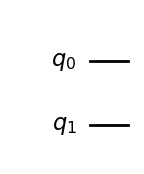

Deutsch function case 1:


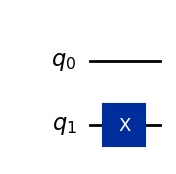

Deutsch function case 2:


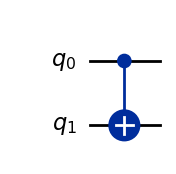

Deutsch function case 3:


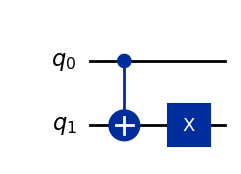

In [69]:
for i in range(4):
    print(f"Deutsch function case {i}:")
    display(deutsch_function(i).draw(output="mpl"))

Finally, we can apply the Deutsch algorithm to each case to determine whether the function is constant or balanced using only a single query to the oracle.

Executing Deutsch algorithm for case 0
Circuit unitary matrix before measurement:


<IPython.core.display.Latex object>

Circuit diagram:


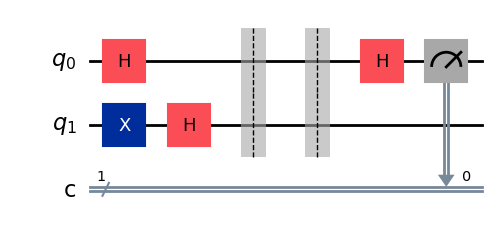

The function is constant.
--------------------------------------------------------------------------------
Executing Deutsch algorithm for case 1
Circuit unitary matrix before measurement:


<IPython.core.display.Latex object>

Circuit diagram:


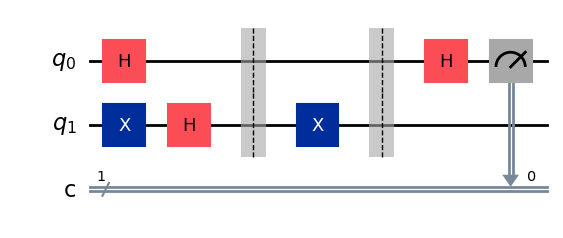

The function is constant.
--------------------------------------------------------------------------------
Executing Deutsch algorithm for case 2
Circuit unitary matrix before measurement:


<IPython.core.display.Latex object>

Circuit diagram:


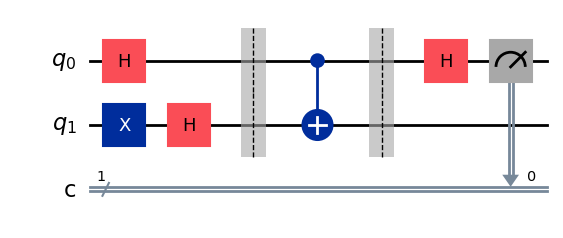

The function is balanced.
--------------------------------------------------------------------------------
Executing Deutsch algorithm for case 3
Circuit unitary matrix before measurement:


<IPython.core.display.Latex object>

Circuit diagram:


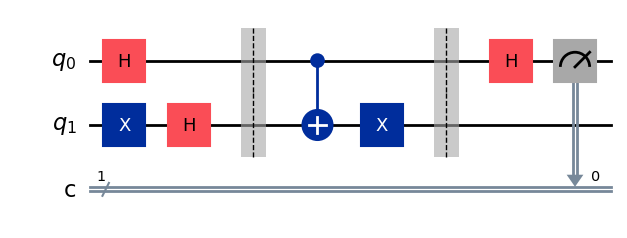

The function is balanced.


In [70]:
for case_deutsch in range(4):
    print(f"Executing Deutsch algorithm for case {case_deutsch}")
    function = deutsch_function(case_deutsch) # Load the specific oracle (f)
    qc = QuantumCircuit(2,1)

    # --- Initialization ---
    qc.h(0) # Put input qubit in superposition
    qc.x(1) # Set auxiliary qubit to |1>
    qc.h(1) # Create |-> state for phase kickback

    qc.barrier()
    qc.compose(function, inplace=True) # Apply the oracle
    qc.barrier()

    # --- Interference and Measurement ---
    qc.h(0) # Map phase information back to computational basis
    
    print("Circuit unitary matrix before measurement:")
    display(Operator.from_circuit(qc).draw("latex")) # Circuit as matrix

    qc.measure(0,0) # Measure the input qubit
    
    print("Circuit diagram:")
    display(qc.draw(output="mpl"))
    
    # --- Execution ---
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1, memory=True).result() 
    measurements = result.get_memory()
    
    # --- Interpretation ---
    if measurements[0] == "0":
        print("The function is constant.") # Result |0> means f(0) = f(1)
    else:
        print("The function is balanced.") # Result |1> means f(0) != f(1)
    if case_deutsch != 3: print (80*'-')

## DEUTSCH-JOTZA ALGORITHM

> ### Deutsch-Jotza Problem
> **Input:** 
> * A function $f: \{0,1\}^n \rightarrow \{0,1\}$
>
> **Output:** 
> * $0$ if $f$ is **constant** ($f(0) = f(1)$)
> * $1$ if $f$ is **balanced** ($f(0) \neq f(1)$) 

The Deutsch-Jozsa algorithm represents a powerful generalization of the original Deutsch algorithm, extending its capabilities from a single-bit input to an $n$-bit string $f: \{0,1\}^n \to \{0,1\}$. In a classical scenario, to determine with 100% certainty whether the function is constant or balanced, we would need $2^{n-1} + 1$ queries in the worst-case scenario. If we query half of the possible inputs and they all return the same value, we still wouldn't know if the remaining half contains a different value (balanced) or the same value (constant).th Deutsch-Jotza algorithm, we can solve this problem with just one query. We will follow the following procedure:
* **Initialization:** we prepare a $n+1$ qbit circuit with $n$ input qbits in the $\ket{0}$ state and one auxiliary qbit in the $\ket{1}$ state. That way, the initial state is:
$$\ket{\psi_0}=\ket{0}^{\otimes n}\ket{1}$$
* **Superposition:** we apply a Hadamard gate to all qbits ($H^{\otimes n+1}$). The $n$ input qbits become the superposition of all posible states and the auxiliar qbit becomes $\ket-$. The state becomes:
$$\ket{\psi_1} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} \ket{x} \otimes \ket-$$
* **Oracle:** we apply the oracle to the qbits. Due to the phase kickback mechanism, the $\ket{-}$ state of the auxiliary qubit remains unchanged, but the phase $(-1)^{f(x)}$ is shifted onto the $n$ input qbits:
$$\ket{\psi_2} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{f(x)}\ket{x} \otimes \ket-$$
* **Interference:** Apply Hadamard gates ($H^{\otimes n}$) to the $n$ input qubits to cause constructive or destructive interference.
$$\ket{\psi_3} = \frac{1}{2^n} \sum_{x \in \{0,1\}^n} \sum_{y \in \{0,1\}^n} (-1)^{f(x) + x \cdot y} \ket{y} \otimes \ket{-}$$
* **Measurement:** We measure the $n$ input qbits. If the result is the all zero string $\ket{00...0}$ the function is constant, otherwise, the function is balanced.
 

We can now implement the algorithm.

In [ ]:
def dj_function(nqbits: int, type_func: str = None):
    """
    Implements the Deutsch-Jozsa function for n qubits.
    
    Args:
        nqbits (int): Number of input qubits.
    Returns:
        qiskit.QuantumCircuit: The quantum circuit implementing the Deutsch-Jozsa oracle.
        function_type (str): 'constant' or 'balanced' indicating the type of function implemented.
    """

    qc = QuantumCircuit(nqbits + 1)

    # Randomly choose between constant and balanced function
    if type_func in ['constant', 'balanced']:
        function_type = type_func
    else:
        function_type = choice(['constant', 'balanced'])

    if function_type == 'constant':
        # Constant function: either do nothing (f(x)=0) or apply X to output qubit (f(x)=1)
        if choice([True, False]):
            qc.x(nqbits)  # f(x) = 1
    else:
        # Balanced function: apply CNOTs from each input qubit to output qubit
        for qubit in range(nqbits):
            qc.cx(qubit, nqbits)

    return qc, function_type

Executing Deutsch-Jozsa algorithm for a constant function
Circuit unitary matrix before measurement:


<IPython.core.display.Latex object>

Circuit diagram:


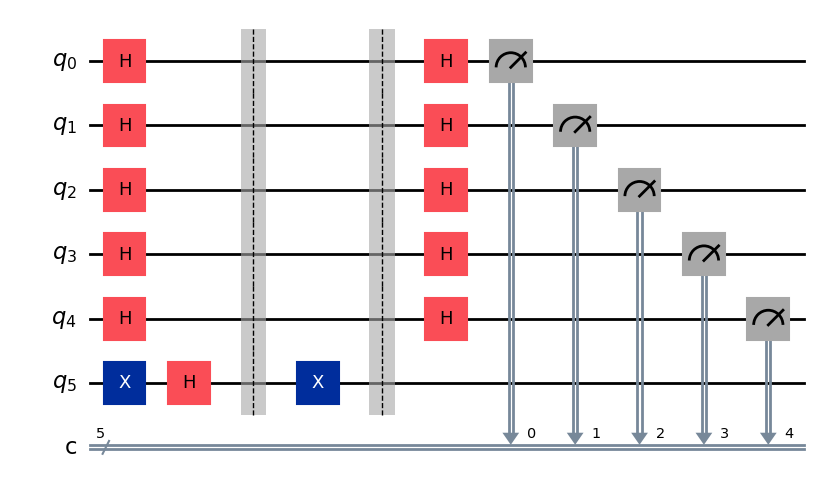

The actual function was constant.
The algorithm guessed that the function is constant.
--------------------------------------------------------------------------------
Executing Deutsch-Jozsa algorithm for a balanced function
Circuit unitary matrix before measurement:


<IPython.core.display.Latex object>

Circuit diagram:


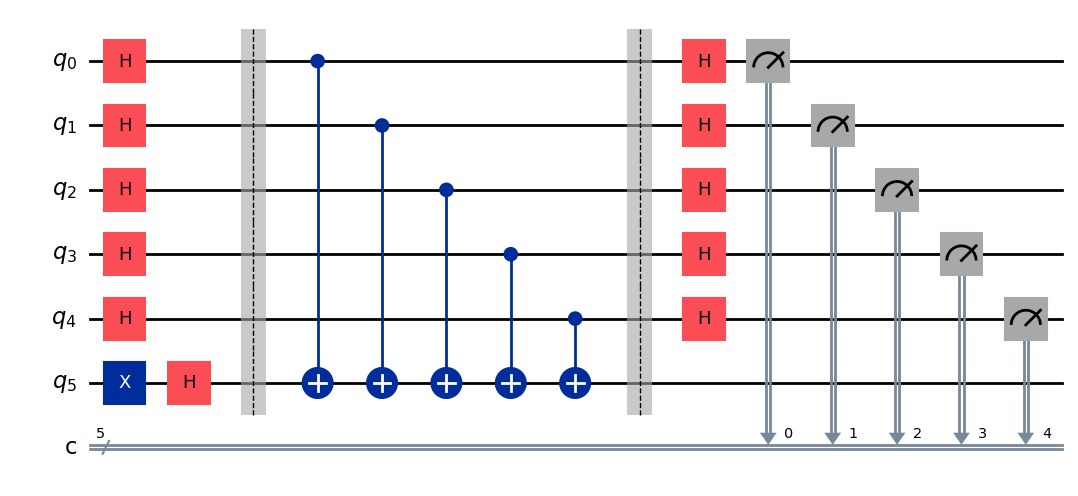

The actual function was balanced.
The algorithm guessed that the function is balanced.


In [72]:
nqbits = 5
for type in ['constant', 'balanced']:
    print(f"Executing Deutsch-Jozsa algorithm for a {type} function")
    function, function_type = dj_function(nqbits, type_func=type) # Load the specific oracle (f)
    qc = QuantumCircuit(nqbits + 1, nqbits)

    # --- Initialization ---
    qc.h(range(nqbits)) # Put input qubits in superposition
    qc.x(nqbits) # Set auxiliary qubit to |1>
    qc.h(nqbits) # Create |-> state for phase kickback

    qc.barrier()
    qc.compose(function, inplace=True) # Apply the oracle
    qc.barrier()

    # --- Interference and Measurement ---
    qc.h(range(nqbits)) # Map phase information back to computational basis

    print("Circuit unitary matrix before measurement:")
    display(Operator.from_circuit(qc).draw("latex")) # Circuit as matrix

    qc.measure(range(nqbits), range(nqbits)) # Measure the input qubits

    print("Circuit diagram:")
    display(qc.draw(output="mpl"))

    # --- Execution ---
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1, memory=True).result() 
    measurements = result.get_memory()

    # --- Interpretation ---
    print(f"The actual function was {function_type}.")
    if measurements[0] == "0" * nqbits:
        print(f"The algorithm guessed that the function is constant.") # Result |00...0> means f(0) = f(1) = ... = f(2^n-1)
    else:
        print("The algorithm guessed that the function is balanced.") # Result |1> means f(0) != f(1)
    if type != 'balanced': print (80*'-')
